# Introduction

Description from Keras.io:

> Keras is a model-level library, providing high-level building blocks for developing deep learning models. It does not handle low-level operations such as tensor products, convolutions and so on itself. Instead, it relies on a specialized, well optimized tensor manipulation library to do so, serving as the "backend engine" of Keras. Rather than picking one single tensor library and making the implementation of Keras tied to that library, Keras handles the problem in a modular way, and several different backend engines can be plugged seamlessly into Keras.


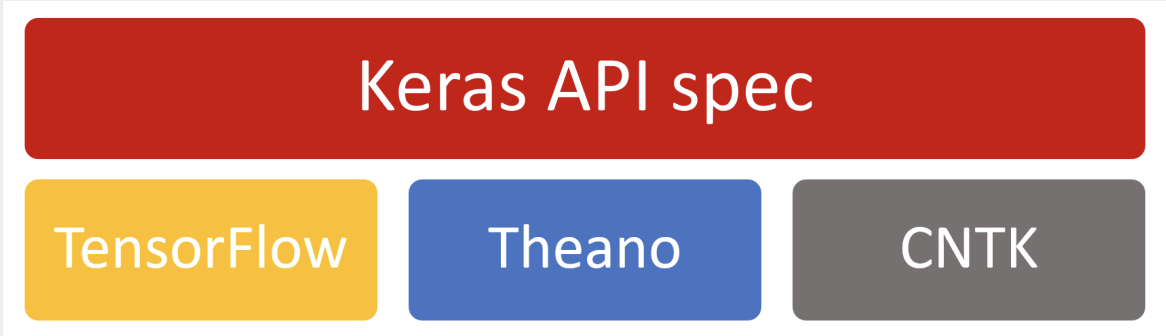

Figure from https://naadispeaks.wordpress.com/2018/06/26/keras-the-api-for-human-beings/

The Keras backend module lets you interact with these back ends more directly.

# Import

It's import to import the `keras.backend` module `as K`.  This means that all backend functions will be referred to as `K.<function_name>` below.

In [1]:
%tensorflow_version 1.x

from keras import backend as K
import numpy as np

TensorFlow 1.x selected.


Using TensorFlow backend.


# Tensor (array) creation

There are two main ways to create arrays with values that you will provide: `K.variable()` and `K.placeholder()`.

## `K.variable`

 * `K.variable(a)`: Create a tensor (array) initialized with the values in the array `a`.  For example, `a` might be a numpy array.
 * You can print the value of a tensor with the `eval` method.


In [0]:
a = np.linspace(1, 15, 15).reshape((3, 5))
k_a = K.variable(a)

In [8]:
K.eval(k_a)

array([[ 1.,  2.,  3.,  4.,  5.],
       [ 6.,  7.,  8.,  9., 10.],
       [11., 12., 13., 14., 15.]], dtype=float32)

In [56]:
k_a

<tf.Variable 'Variable_13:0' shape=(3, 5) dtype=float32>

## `K.placeholder`

 * `K.placeholder(shape)`: Create a space for a tensor of specified shape that will be filled in with actual numeric values later.


In [0]:
k_placeholder = K.placeholder(shape=(3, 5))

If you try to evaluate the tensor before filling it with values, you get an error (not shown).  But you can see that the object has been created as an "empty" array of the desired shape.

In [11]:
k_placeholder

<tf.Tensor 'Placeholder:0' shape=(3, 5) dtype=float32>

# Tensor manipulation

## `K.concatenate`

* `K.concatenate((a, b), axis = 0)` stacks the tensors a and b on top of each other.
* `K.concatenate((a, b), axis = 1)` stacks the tensors a and b next to each other.


In [13]:
a = np.linspace(1, 15, 15).reshape((3, 5))
b = np.linspace(16, 30, 15).reshape((3, 5))
k_a = K.variable(a)
k_b = K.variable(b)

a_concat_b = K.concatenate((a, b), axis = 0)
K.eval(a_concat_b)

array([[ 1.,  2.,  3.,  4.,  5.],
       [ 6.,  7.,  8.,  9., 10.],
       [11., 12., 13., 14., 15.],
       [16., 17., 18., 19., 20.],
       [21., 22., 23., 24., 25.],
       [26., 27., 28., 29., 30.]])

### `K.reshape`

 * `K.reshape(shape)` reshapes an array

In [14]:
a = np.linspace(1, 24, 24).reshape((2, 3, 4))
k_a = K.variable(a)
K.eval(k_a)

array([[[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]],

       [[13., 14., 15., 16.],
        [17., 18., 19., 20.],
        [21., 22., 23., 24.]]], dtype=float32)

In [15]:
k_a_reshaped = K.reshape(k_a, (2*3, 4))
K.eval(k_a_reshaped)

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.],
       [ 9., 10., 11., 12.],
       [13., 14., 15., 16.],
       [17., 18., 19., 20.],
       [21., 22., 23., 24.]], dtype=float32)

### Indexing

We can index using usual conventions.

In [17]:
a = np.linspace(1, 24, 24).reshape((2, 3, 4))
k_a = K.variable(a)
K.eval(k_a)

array([[[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]],

       [[13., 14., 15., 16.],
        [17., 18., 19., 20.],
        [21., 22., 23., 24.]]], dtype=float32)

In [18]:
K.eval(k_a[0, 1, :])

array([5., 6., 7., 8.], dtype=float32)

# Mathematical Operations

## `K.sum(a)`

 * `K.sum(a)` adds all entries of `a`

In [22]:
a = np.linspace(1, 6, 6).reshape((2, 3))
k_a = K.variable(a)
K.eval(k_a)

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [23]:
k_a_sum = K.sum(k_a)
K.eval(k_a_sum)

21.0

## `K.square(a)`, `K.pow(a, pow)`

 * `K.square(a)` calculates the elementwise square of `a`
 * `K.pow(a, pow)` calculates the elementwise power of `a` to the power of `pow`

In [24]:
a = np.linspace(1, 6, 6).reshape((2, 3))
k_a = K.variable(a)
K.eval(k_a)

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [26]:
k_a_sq = K.square(k_a)
K.eval(k_a_sq)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

In [27]:
k_a_pow_3 = K.pow(k_a, 3)
K.eval(k_a_pow_3)

array([[  1.,   8.,  27.],
       [ 64., 125., 216.]], dtype=float32)

## `K.dot`, `K.transpose`

 * `K.dot(a, b)` calculates the dot product of `a` and `b`
 * `K.transpose(a)` calculates the transpose of `a`

In [29]:
a = np.linspace(1, 15, 15).reshape((3, 5))
b = np.linspace(16, 30, 15).reshape((3, 5))
k_a = K.variable(a)
k_b = K.variable(b)

a_dot_bT = K.dot(k_a, K.transpose(k_b))
K.eval(a_dot_bT)

array([[ 280.,  355.,  430.],
       [ 730.,  930., 1130.],
       [1180., 1505., 1830.]], dtype=float32)

# Higher Level Utilities

The real point of libraries like tensorflow is that they let you set up a sequence of calculations and *automatically calculate gradients*.

We will see two separate pieces of functionality here:

1. gradient calculations
2. functions that allow the inputs to change (using placeholders)

## `K.gradients`

 * `K.gradients(loss, [inputs])` will calculate the gradient of the scalar `loss` with respect to the `inputs`.

To illustrate, suppose that the function we want to calculate does the following:
 * Multiplies a $3 \times 2$ array `x` by a $2 \times 4$ array `a`
 * Squares all elements of the result
 * Calculates the sum of all elements of the result

Here's how we could set that up:

In [50]:
# define a
a_np = np.linspace(1, 8, 8).reshape((2, 4))
a = K.variable(a_np)

# define x
x_np = np.ones((3, 2)) # there is also a K.ones function
x = K.variable(x_np)

# calculate the output.  This is a scalar
out = K.sum(K.square(K.dot(x, a)))

# calculate the gradient
grad = K.gradients(out, [x])

# grad is a list since we specified a list of inputs, [x]
K.eval(grad[0])

array([[200., 488.],
       [200., 488.],
       [200., 488.]], dtype=float32)

## `K.function`

 * `K.function(inputs, outputs)` lets us define the idea of a function (though the syntax is fairly different from how this would be done anywhere else).

Now suppose we want to allow `x` to change.  We define it as a `placeholder`, and define a function of `x` that we can evaluate.

In [0]:
# define a.  Values are known, so it's a variable
a_np = np.linspace(1, 8, 8).reshape((2, 4))
a = K.variable(a_np)

# define x.  Values are not known yet (change for each function call),
# so it's a placeholder
x = K.placeholder((3, 2))

# calculate the output of this function
out = K.sum(K.square(K.dot(x, a)))

# calculate the gradient
grad = K.gradients(out, [x])

# create a function; it is a function of x that returns out and the gradient of
# out with respect to x
f = K.function(inputs = [x], outputs = [out, grad])

Here's how we could evaluate our function for different inputs `x`:

In [63]:
x1 = np.random.standard_normal((3, 2))
f([x1])

[1588.2238, [array([[ 240.70049,  577.87836],
         [-139.3987 , -344.25278],
         [-323.7428 , -804.0344 ]], dtype=float32)]]

In [62]:
x2 = np.random.standard_normal((3, 2))
f([x2])

[1198.6342, [array([[ 315.6671 ,  767.1555 ],
         [ 124.38188,  287.92764],
         [-157.51483, -388.70428]], dtype=float32)]]